In [1]:
from google.colab import files

# Upload CSV file
uploaded = files.upload()


Saving survey lung cancer.csv to survey lung cancer.csv


In [ ]:
import pandas as pd

# Load the dataset from the uploaded CSV file
df = pd.read_csv('/content/survey lung cancer.csv')

# Display the first few rows of the dataframe
print(df.head())


  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

# New Section

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

# Define features and target
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create the ANN model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=5)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9685 - loss: 0.0736
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9813 - loss: 0.0679
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9654 - loss: 0.0898
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9689 - loss: 0.0794
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9672 - loss: 0.0736
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9680 - loss: 0.0665
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9716 - loss: 0.0667
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9697 - loss: 0.0728
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9763 - loss: 0.0743
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9874 - loss: 0.0488
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9763 - loss: 0.0619
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9821 - lo

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9153 - loss: 0.1312  
Test Accuracy: 0.9355


In [ ]:
22# Function to get user input
def get_user_input():
    gender = input("Enter gender (M/F): ")
    age = int(input("Enter age: "))
    smoking = int(input("Enter smoking (1 for Yes, 2 for No): "))
    yellow_fingers = int(input("Enter yellow fingers (1-2): "))
    anxiety = int(input("Enter anxiety (1-2): "))
    peer_pressure = int(input("Enter peer pressure (1-2): "))
    chronic_disease = int(input("Enter chronic disease (1-2): "))
    fatigue = int(input("Enter fatigue (1-2): "))
    allergy = int(input("Enter allergy (1-2): "))
    wheezing = int(input("Enter wheezing (1-2): "))
    alcohol_consuming = int(input("Enter alcohol consuming (1-2): "))
    coughing = int(input("Enter coughing (1-2): "))
    shortness_of_breath = int(input("Enter shortness of breath (1-2): "))
    swallowing_difficulty = int(input("Enter swallowing difficulty (1-2): "))
    chest_pain = int(input("Enter chest pain (1-2): "))

    return {
        'GENDER': gender,
        'AGE': age,
        'SMOKING': smoking,
        'YELLOW_FINGERS': yellow_fingers,
        'ANXIETY': anxiety,
        'PEER_PRESSURE': peer_pressure,
        'CHRONIC DISEASE': chronic_disease,
        'FATIGUE': fatigue,
        'ALLERGY': allergy,
        'WHEEZING': wheezing,
        'ALCOHOL CONSUMING': alcohol_consuming,
        'COUGHING': coughing,
        'SHORTNESS OF BREATH': shortness_of_breath,
        'SWALLOWING DIFFICULTY': swallowing_difficulty,
        'CHEST PAIN': chest_pain
    }
import numpy as np

def prepare_input(user_input):
    # Encode gender
    user_input['GENDER'] = 1 if user_input['GENDER'].upper() == 'M' else 0

    # Create a numpy array from the user input
    input_data = np.array([[
        user_input['GENDER'],
        user_input['AGE'],
        user_input['SMOKING'],
        user_input['YELLOW_FINGERS'],
        user_input['ANXIETY'],
        user_input['PEER_PRESSURE'],
        user_input['CHRONIC DISEASE'],
        user_input['FATIGUE'],
        user_input['ALLERGY'],
        user_input['WHEEZING'],
        user_input['ALCOHOL CONSUMING'],
        user_input['COUGHING'],
        user_input['SHORTNESS OF BREATH'],
        user_input['SWALLOWING DIFFICULTY'],
        user_input['CHEST PAIN']
    ]])

    # Scale the input using the same scaler used during training
    input_data_scaled = scaler.transform(input_data)
    return input_data_scaled
def predict_cancer(model):
    user_input = get_user_input()
    input_data_scaled = prepare_input(user_input)

    prediction = model.predict(input_data_scaled)
    predicted_class = 'HAVE CHARACTERISTICS OF LUNG CANCER' if prediction[0][0] > 0.5 else 'DOES NOT HAVE CHARACTERISTICS OF LUNG CANCER'

    print(f"Predicted Lung Cancer: {predicted_class}")
# Call this function to get input and make a prediction
predict_cancer(model)


Enter gender (M/F): m
Enter age: 20
Enter smoking (1 for Yes, 2 for No): 1
Enter yellow fingers (1-2): 2
Enter anxiety (1-2): 2
Enter peer pressure (1-2): 1
Enter chronic disease (1-2): 1
Enter fatigue (1-2): 1
Enter allergy (1-2): 2
Enter wheezing (1-2): 1
Enter alcohol consuming (1-2): 1
Enter coughing (1-2): 1
Enter shortness of breath (1-2): 2
Enter swallowing difficulty (1-2): 2
Enter chest pain (1-2): 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Lung Cancer: DOES NOT HAVE CHARACTERISTICS OF LUNG CANCER


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


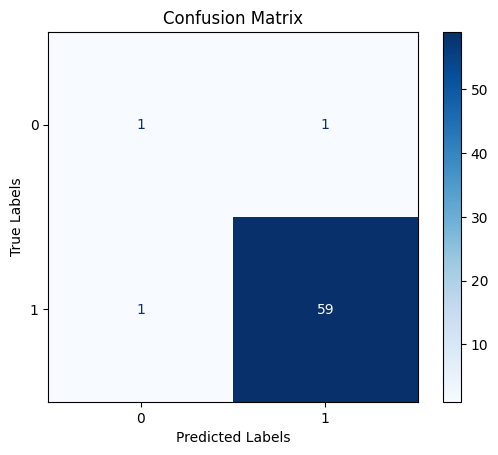

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example data (replace with actual data)
# X, y should be defined with your dataset
# X = ...  # Feature matrix
# y = ...  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
correlation = df.corr()
correlation


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


In [ ]:
num_col=df.select_dtypes(include=np.number).columns.to_list()
len(num_col)

16

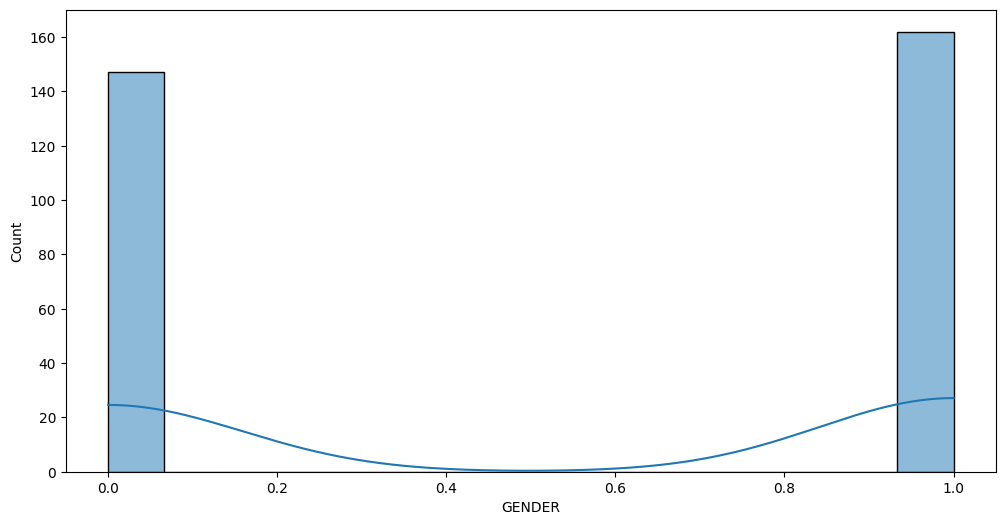

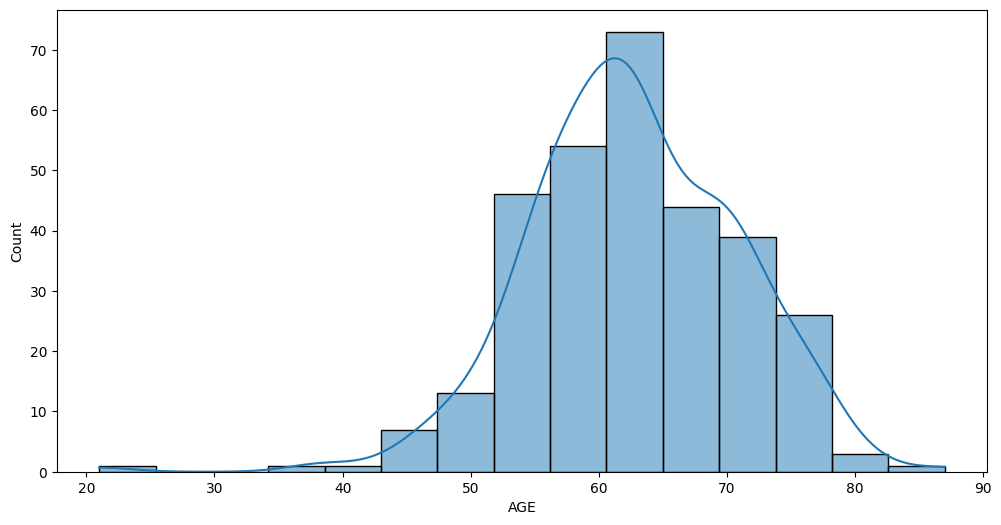

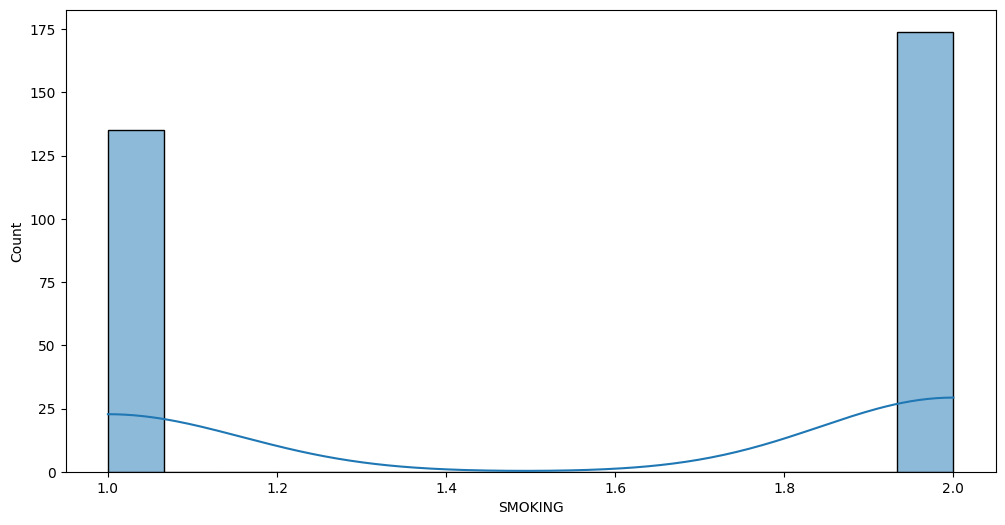

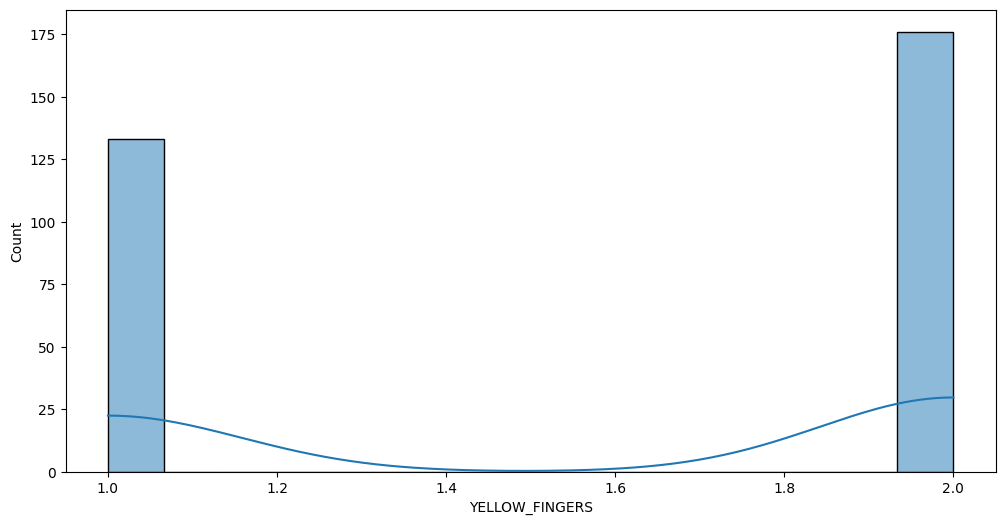

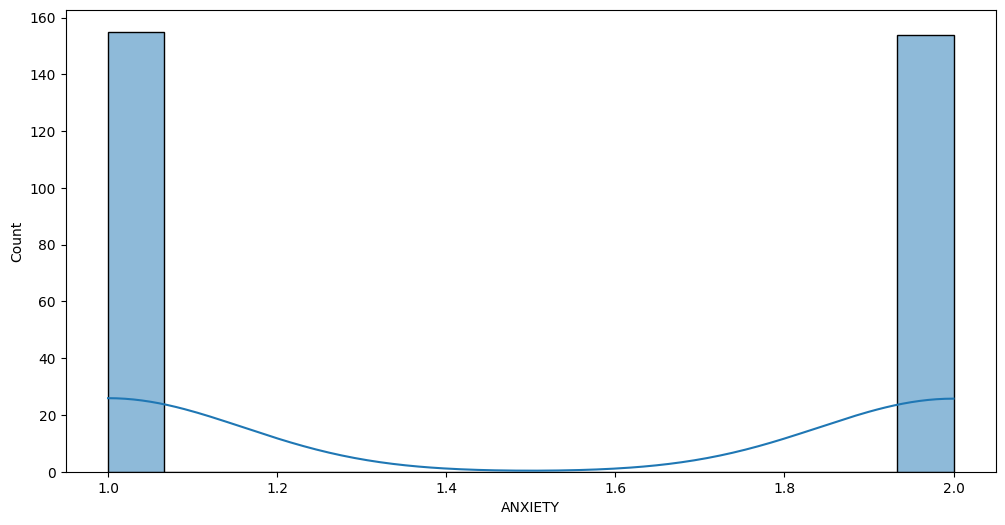

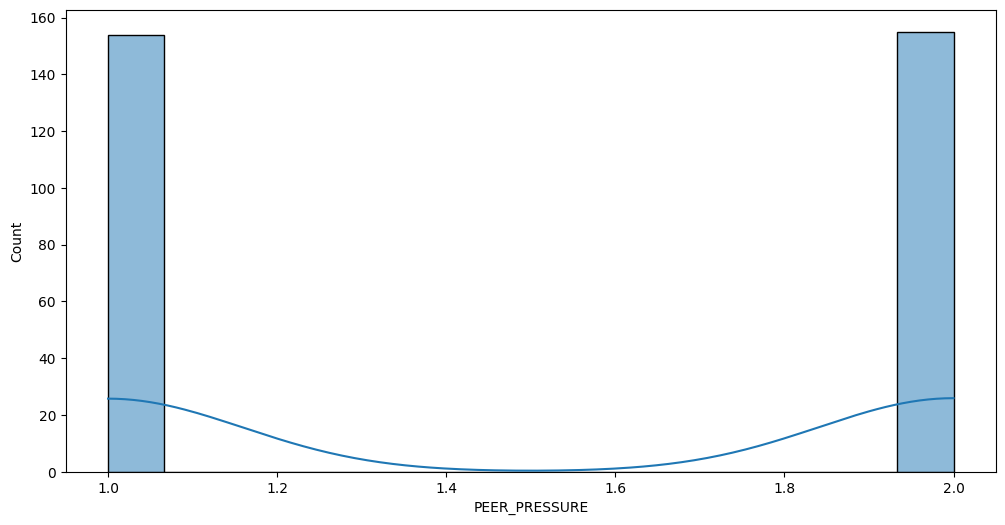

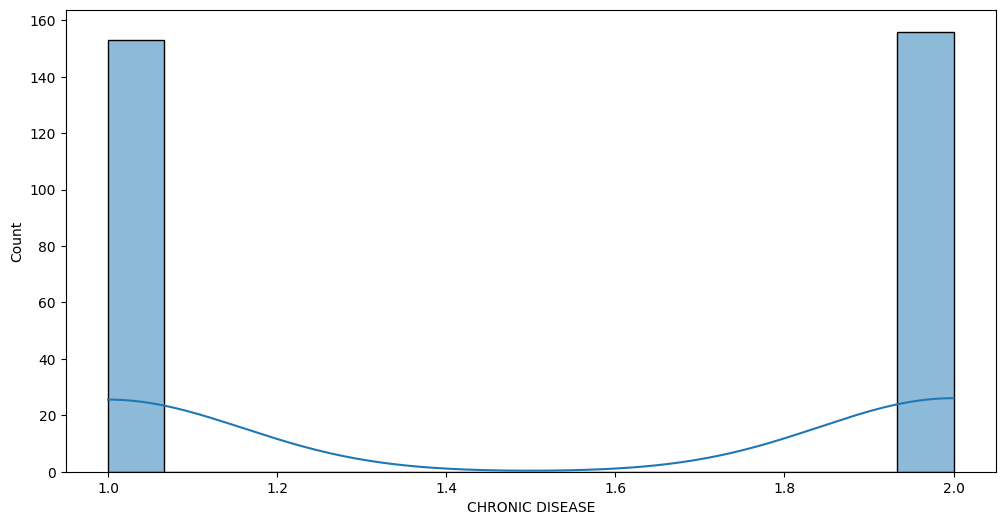

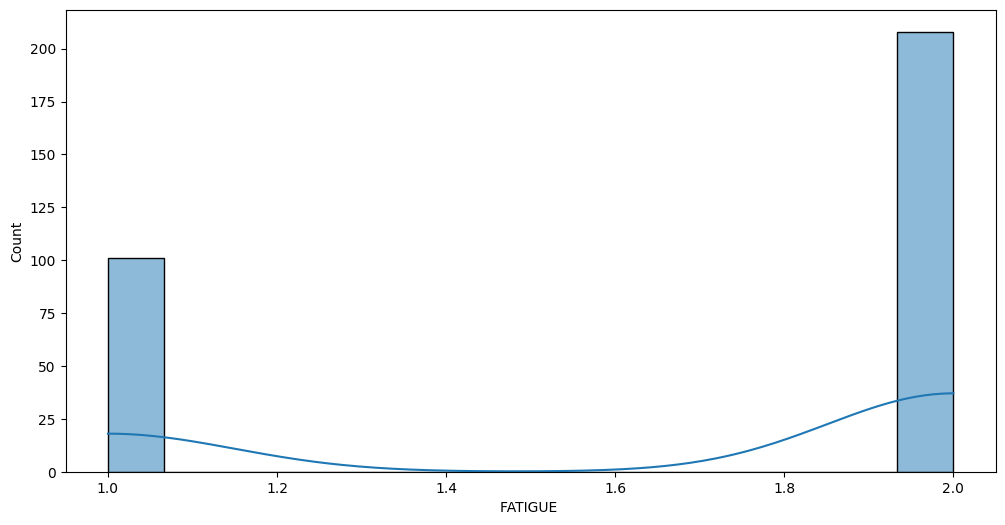

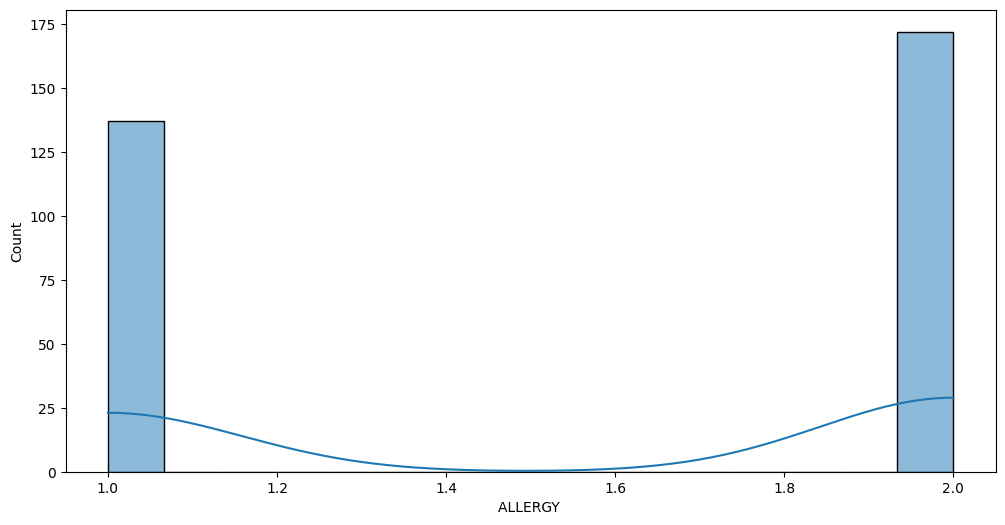

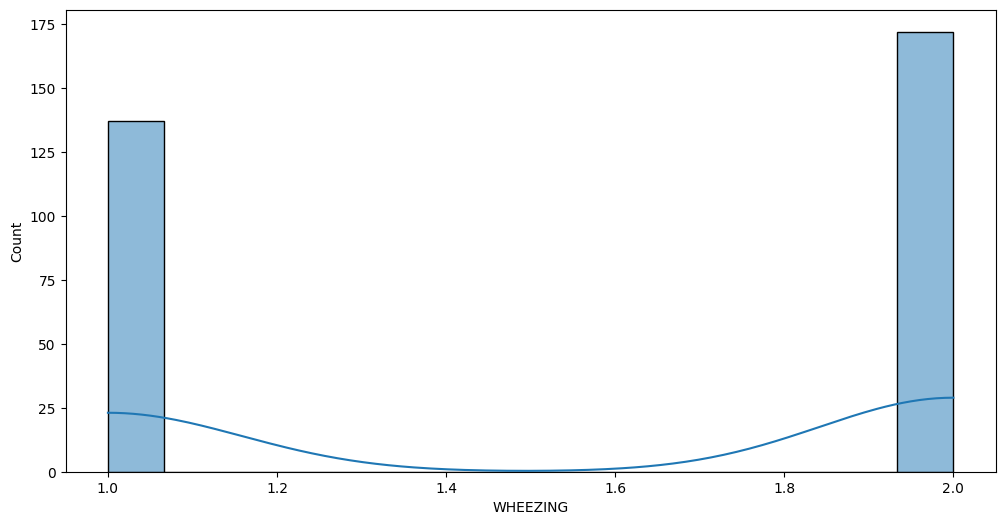

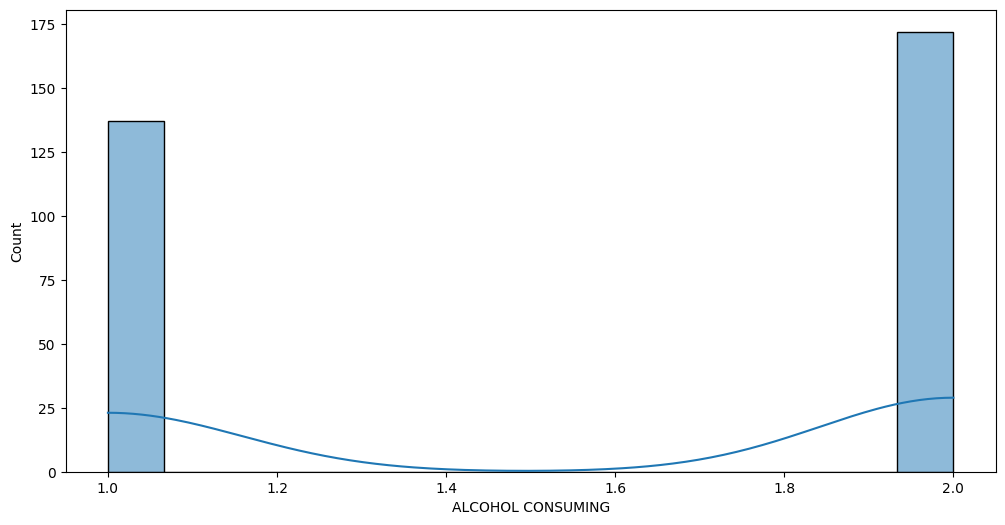

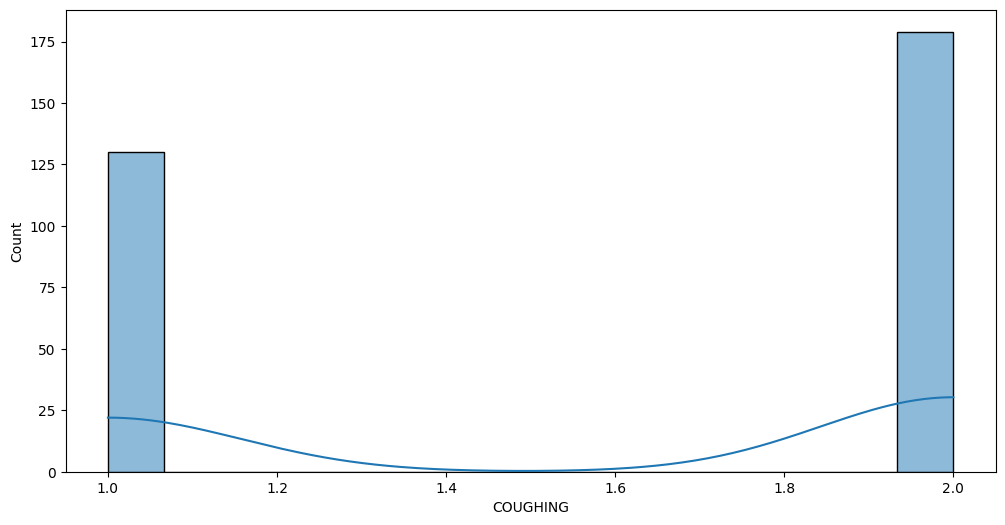

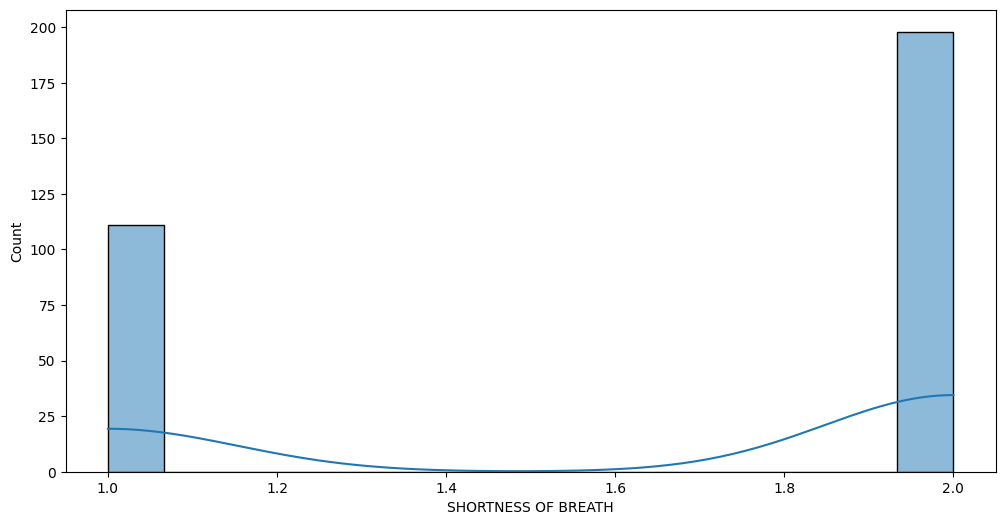

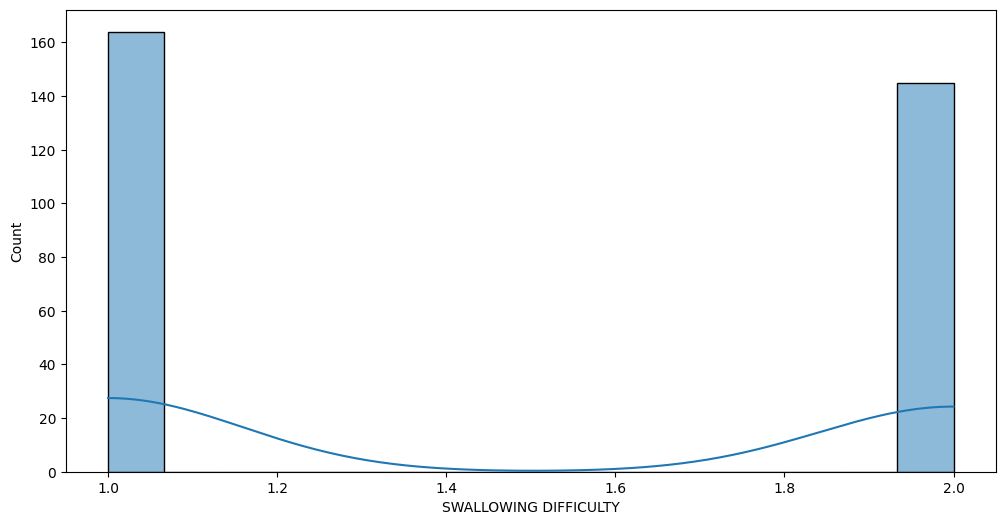

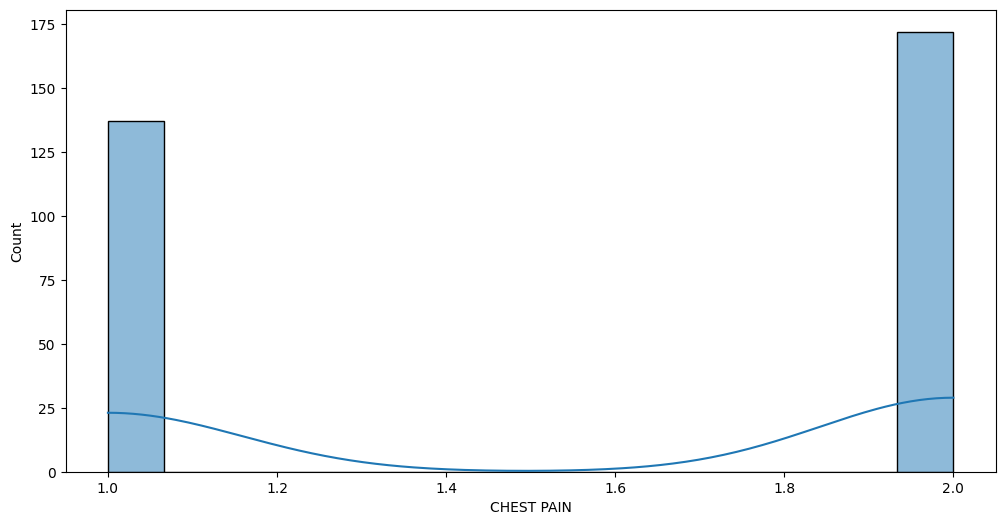

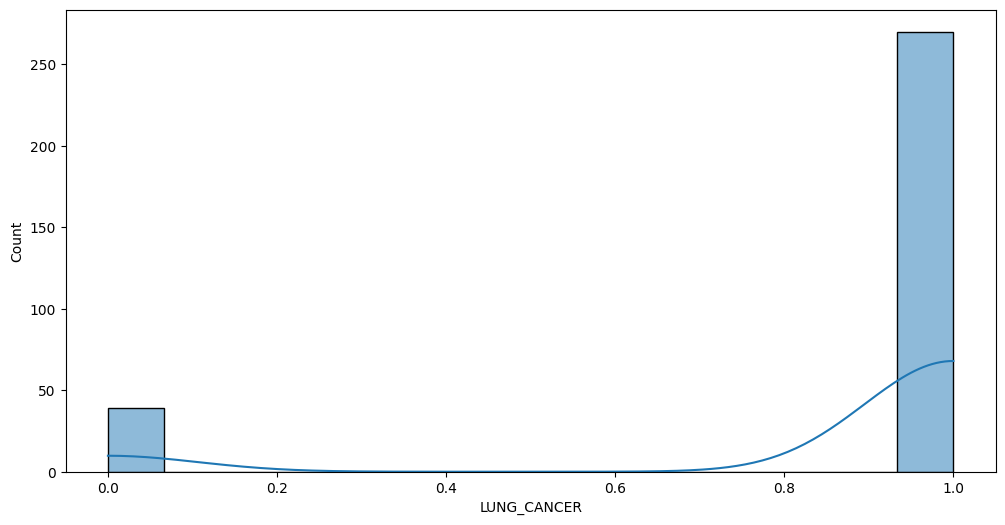

In [ ]:
for i in num_col:
    plt.figure(figsize=(12,6));
    sns.histplot(df[i],bins=15, kde=True);

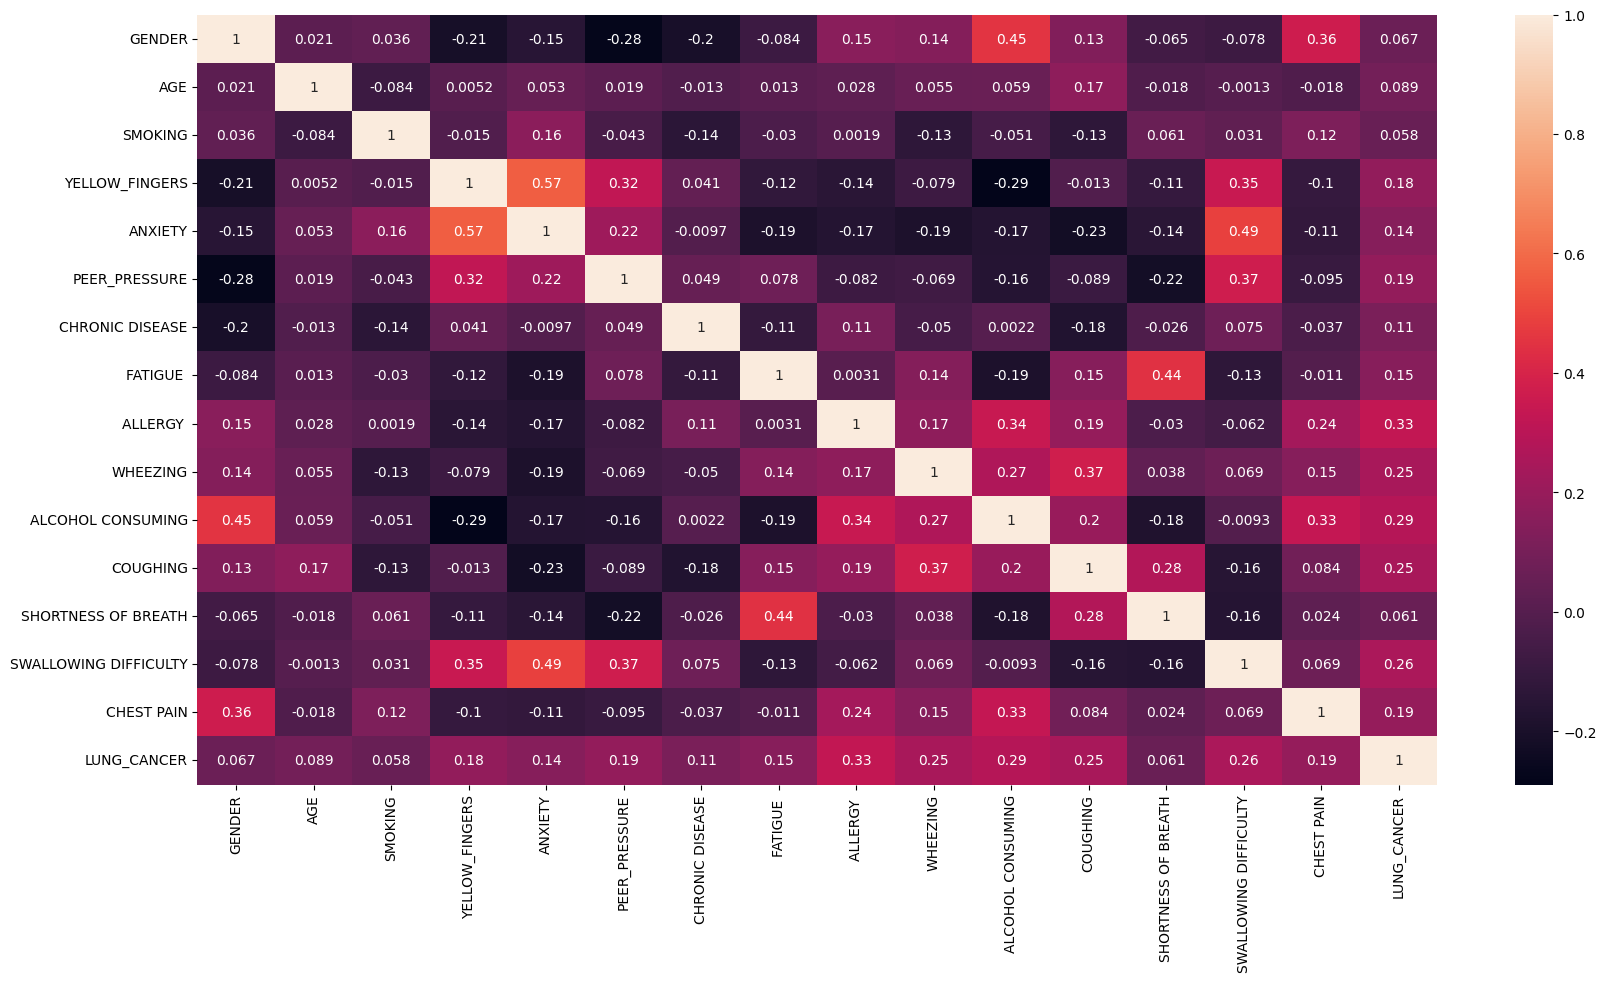

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);